# Introduction to Image Processing

In this notebook, we will explore some fundamental concepts of image processing using OpenCV. 

Credit: Maria Musiał

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [13]:
# Function to display images
def show_image(img, title="Image"):
    plt.figure(figsize=(4,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

def show_orignal_image(img, title="Image"):
    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()
    
def show_images(images, titles, iks, igrek, cmap="gray"):
    plt.figure(figsize=(12, 6))
    for i in range(len(images)):
        plt.subplot(iks, igrek, i + 1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis("off")
    plt.show()

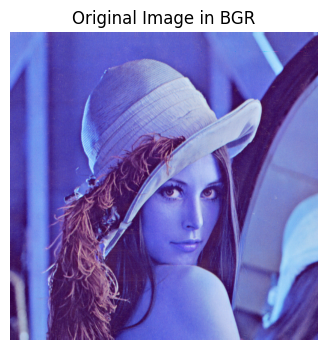

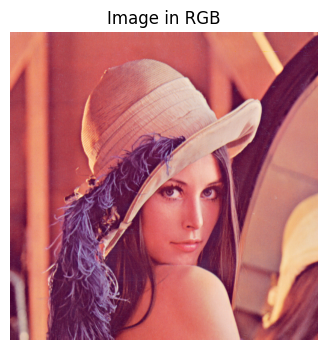

In [ ]:
# Load a sample image (replace with a valid path)
img = cv2.imread("lenna.png")  #Ładowanie zdjęcia
show_orignal_image(img, "Original Image in BGR")
show_image(img, "Image in RGB")

## Changing colors
OpenCV includes a ready function **cvtColor**, which takes the image to be processed as the first parameter, and a constant specifying the type of conversion as the second parameter (constants marked by variables, eg COLOR_RGB2BGR).

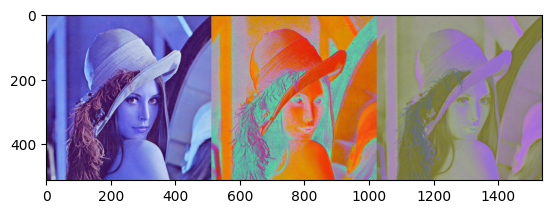

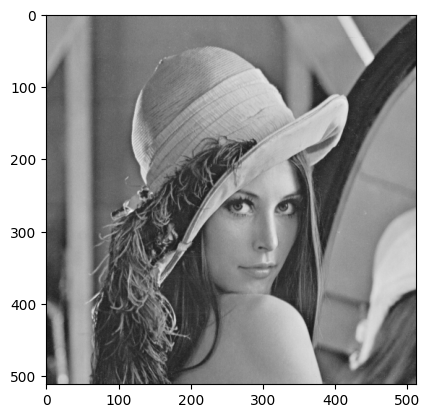

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #Zmiana koloru
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_luv = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)
img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(np.concatenate([img_rgb, img_hsv, img_luv], 1), cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_grayscale, cv2.COLOR_BGR2RGB))
plt.show()


## Gamma Correction

Gamma correction is used to adjust the brightness of an image. The transformation formula is:

* gamma correction: $$F(i, \gamma) = i^\gamma$$

Try different values of gamma to see how it affects the image.


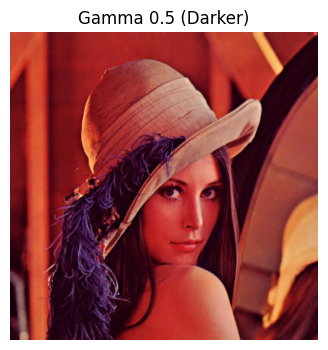

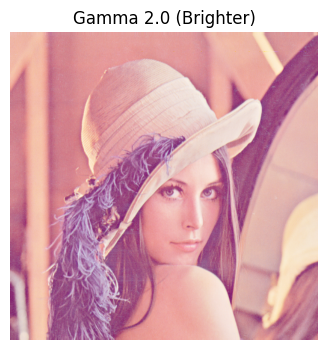

In [16]:
def gamma_correction(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Example with gamma 0.5 and 2.0
gamma_low = gamma_correction(img, 0.5)
gamma_high = gamma_correction(img, 2.0)

show_image(gamma_low, "Gamma 0.5 (Darker)")
show_image(gamma_high, "Gamma 2.0 (Brighter)")

## 2D Transformations

| Transformation name | included operations | Preserves |
|---|---|---|
|translation| translation| straight lines, parallelism, angles, lengths, orientation    |
|rigid (Euclidean) | translation, rotation| straight lines, parallelism, angles, lengths    |
|similarity | translation, rotation, scaling| straight lines, parallelism, angles    |
|affine | translation, rotation, scaling, affine| straight lines, parallelism    |
|projective  | translation, rotation, scaling, affine, projective| straight lines    |

## Convolution
A convolution is an operation on two functions $f$ and $g$, the result of which is a third function $(f \ast g)$. The convolution can be described by the following formula:

$$(f \ast g)(t) = \int_{-\infty}^{\infty} f(\tau)g(t - \tau)d\tau$$

The OpenCV library contains ready-made implementations of many convolutional operations. The most popular are:
* **blur** - based on the mean of adjacent pixels (equal weights),
* **gaussian blur** - weighted pixel blur according to the Gaussian distribution,
* **laplacian**,
* **sobel** (edge detection),
* **median filter**,
* **bilateral** - weighted pixel blur based on Gaussian distribution and pixel intensity difference

The results of their implementation in OpenCV are presented below.

## Image Blurring and Gaussian Blur

Blurring is a common image processing technique used to reduce noise and smooth an image. It works by averaging pixel values in a neighborhood using a kernel (also called a filter). 

### 1. Box Blur (Averaging Filter)

A box blur is a simple averaging filter where each pixel is replaced by the average of its surrounding pixels. The kernel for a **3×3 averaging filter** looks like this:

$$K = \frac{1}{9}
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}$$

For a **5×5 kernel**, the values are:

$$
K = \frac{1}{25}
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1
\end{bmatrix}
$$

This filter is applied using convolution over the image.

### 2. Gaussian Blur

Gaussian blur is a more advanced blurring technique that gives more weight to pixels closer to the center. The Gaussian kernel for a **3×3 filter** looks like this:

$$
K =
\frac{1}{16}
\begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{bmatrix}
$$

For a **5×5 kernel**, it is:

$$
K =
\frac{1}{256}
\begin{bmatrix}
1 & 4 & 6 & 4 & 1 \\
4 & 16 & 24 & 16 & 4 \\
6 & 24 & 36 & 24 & 6 \\
4 & 16 & 24 & 16 & 4 \\
1 & 4 & 6 & 4 & 1
\end{bmatrix}
$$


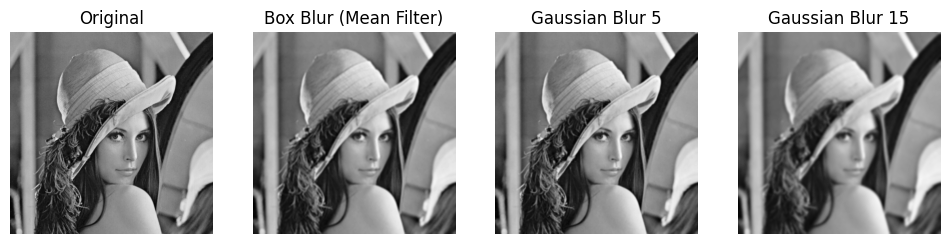

In [ ]:
img = cv2.imread("lenna.png", cv2.IMREAD_GRAYSCALE)

# 1. Box Blur (Mean Filter) using a 5x5 kernel
box_blur = cv2.blur(img, (5, 5))

# 2. Gaussian Blur with a 5x5 kernel
gaussian_blur5 = cv2.GaussianBlur(img, (5,5), 0)
gaussian_blur15 = cv2.GaussianBlur(img, (15,15), 0)


# Display results
show_images(
    [img, box_blur, gaussian_blur5, gaussian_blur15],
    ["Original", "Box Blur (Mean Filter)", "Gaussian Blur 5", "Gaussian Blur 15"], 1, 4
)


### 2. Edge Detection

Edge detection algorithms highlight significant transitions in an image. Common methods:
- **Sobel Filter**: Highlights horizontal and vertical edges.
  - Sobel X (Horizontal Edges)
$$g = 
\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
$$

  - Sobel Y (Vertical Edges)
$$g = 
\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$$
- **Laplacian Filter**: Captures all directions of edges.
$$g = \begin{bmatrix}
0 & -1 & 0\\
-1 & 4 & -1\\
0 & -1 & 0\\
\end{bmatrix}$$
- **Canny Edge Detector**: A more advanced multi-stage edge detection method.


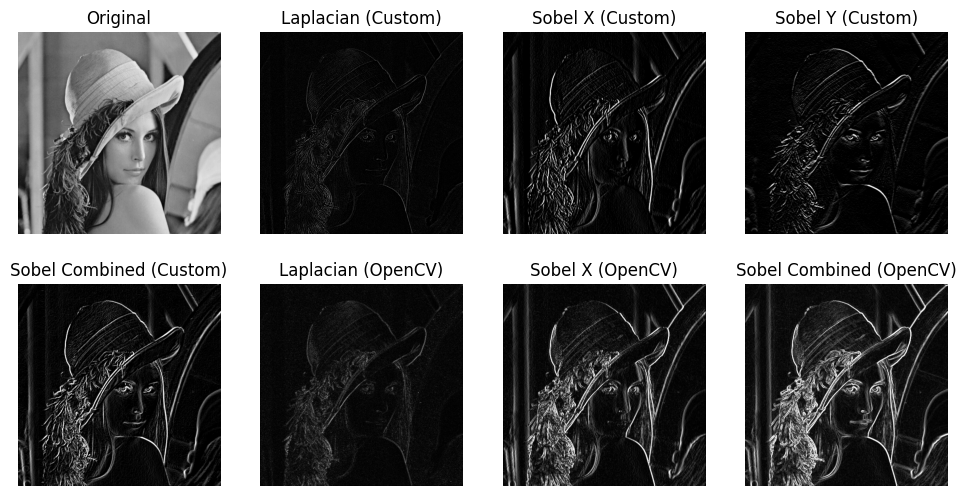

In [18]:
# Define the custom kernels
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

sobel_x_kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

sobel_y_kernel = np.array([[-1, -2, -1],
                           [ 0,  0,  0],
                           [ 1,  2,  1]])

# Apply custom filters using convolution
laplacian_custom = cv2.filter2D(img, -1, laplacian_kernel)
sobel_x_custom = cv2.filter2D(img, -1, sobel_x_kernel)
sobel_y_custom = cv2.filter2D(img, -1, sobel_y_kernel)

# Convert the result to CV_64F type for proper magnitude calculation
sobel_x_custom = np.float64(sobel_x_custom)
sobel_y_custom = np.float64(sobel_y_custom)

# Combine X and Y sobel filters
sobel_combined_custom = cv2.magnitude(sobel_x_custom, sobel_y_custom)

# Apply OpenCV's built-in functions
laplacian_opencv = cv2.Laplacian(img, cv2.CV_32F)
sobel_x_opencv = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3)
sobel_y_opencv = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=3)
sobel_combined_opencv = cv2.magnitude(sobel_x_opencv, sobel_y_opencv)

# Normalize the results to fit the 8-bit range [0, 255] for proper display
laplacian_custom = cv2.convertScaleAbs(laplacian_custom)
sobel_x_custom = cv2.convertScaleAbs(sobel_x_custom)
sobel_y_custom = cv2.convertScaleAbs(sobel_y_custom)
sobel_combined_custom = cv2.convertScaleAbs(sobel_combined_custom)

laplacian_opencv = cv2.convertScaleAbs(laplacian_opencv)
sobel_x_opencv = cv2.convertScaleAbs(sobel_x_opencv)
sobel_combined_opencv = cv2.convertScaleAbs(sobel_combined_opencv)


# Show the images
show_images(
    [img, laplacian_custom, sobel_x_custom, sobel_y_custom, sobel_combined_custom,
     laplacian_opencv, sobel_x_opencv, sobel_combined_opencv],
    ["Original", "Laplacian (Custom)", "Sobel X (Custom)", "Sobel Y (Custom)", "Sobel Combined (Custom)",
     "Laplacian (OpenCV)", "Sobel X (OpenCV)", "Sobel Combined (OpenCV)"], 2, 4
)


# Student Exercise

Try to implement the following tasks on your own:
1. Apply Gamma Correction with a gamma value of **1.5** and display the result.
2. Implement on your own and compare edge detectors
    - Download a grayscale image 
    - Implement Sobel, Laplacian operators (dont forget to combine X and Y Sobel filters)
    - Visualise
    - Compare results
    - **Additionally check Canny Edge Detector** - implementation with opencv:    https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html
